## Quantum Fourier Transform: 2 qubit example

This notebook is based on IBM developed Fourier Transformation example by Anna Phan

## Introduction <a id='introduction'></a>

The Fourier transform occurs in many different versions throughout classical computing, in areas ranging from signal processing to data compression to complexity theory. The quantum Fourier transform (QFT) is the quantum implementation of the discrete Fourier transform over the amplitudes of a wavefunction. It is part of many quantum algorithms, most notably Shor's factoring algorithm and quantum phase estimation. 

## Background 

The quantum Fourier transform for when $N = 2$, it is the Hadamard operator ($H$)

For N=3,  the three Qunot model is documented in Box 5.1 on page 220 of Nielsen, M.A. and Chuang, I., 2002. 
Quantum computation and quantum information.

In [8]:
# Initialization
import sys

# Importing QISKit
from qiskit import QuantumCircuit, QuantumProgram
import numpy as np
from IPython.display import Image
import math
import Qconfig

# Import basic plotting tools
from qiskit.tools.visualization import plot_histogram

# Quantum program setup 
Q_program = QuantumProgram()
Q_program.set_api(Qconfig.APItoken, Qconfig.config["url"]) # set the APIToken and API url
print("Qconfig.APItoken = ", Qconfig.APItoken)
print("Qconfig.APItoken = ", Qconfig.config['url'])

Qconfig.APItoken =  844091f5423e0618692be831db7ac2c363de93d74fabb0a294bf8b57534d21e70739dfe7fa497d916e175f4bd2cf07205d9cd0afc0c1d26f9711f3eff7966be0
Qconfig.APItoken =  https://quantumexperience.ng.bluemix.net/api


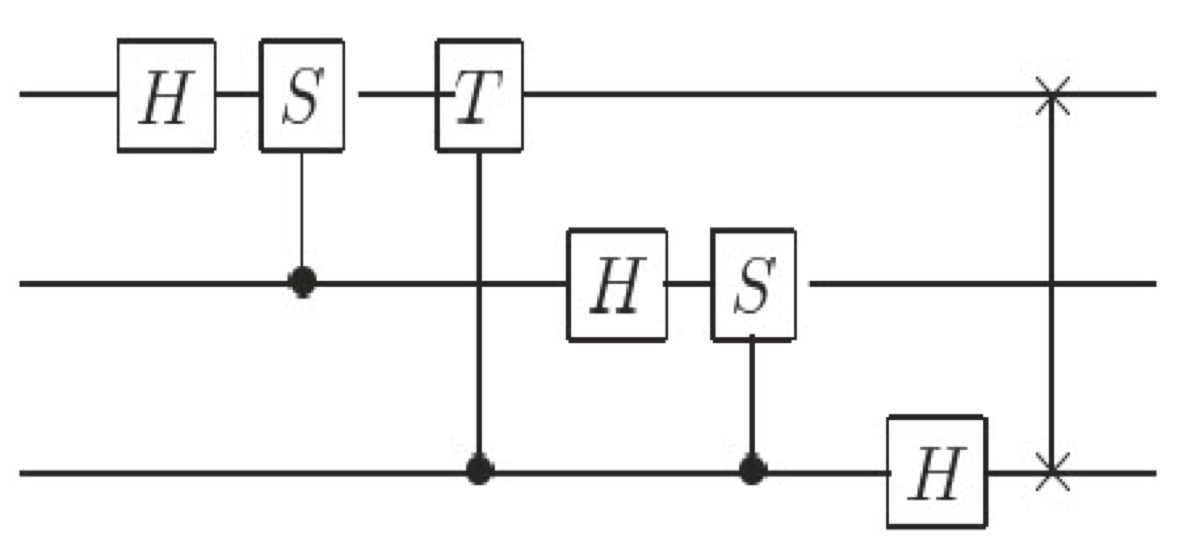

In [31]:
Image(filename='/home/jupyter/Nielsen_QFT.png')

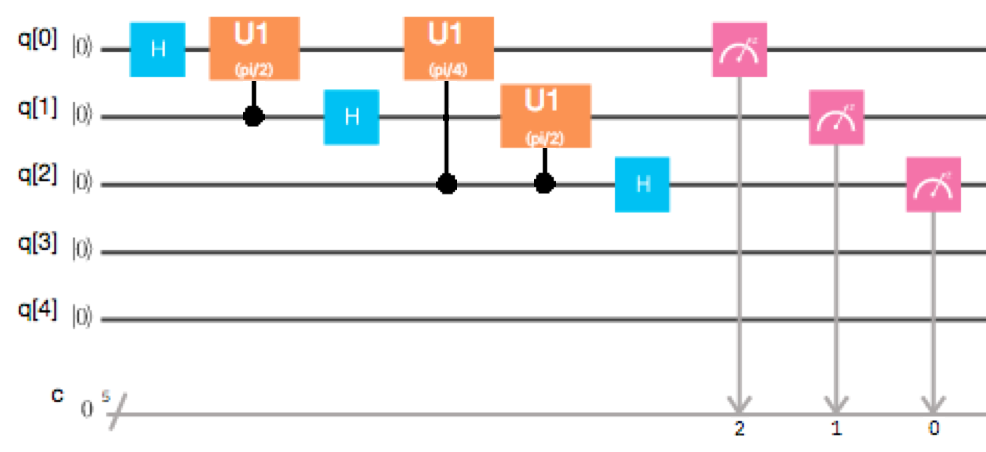

In [2]:
#The equivalent implementation using IBM Quantum Composer is the following
Image(filename='/home/jupyter/qft3.png')

### CU1 (in the diagram U1) is a controlled Rotation Gate, acting as implementation to Controled S and Controlled T gates  (see diagram - extract from Chapter 4 ppt slide 33)

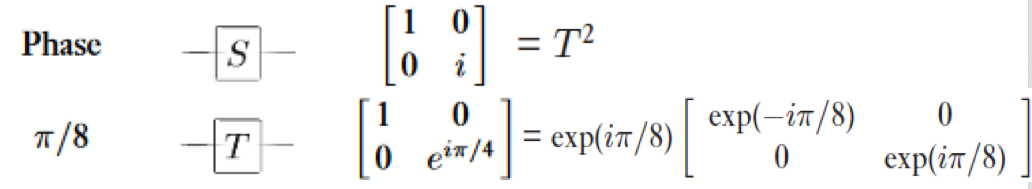

In [33]:
Image(filename='/home/jupyter/CU-T-S.png')

### Wikipedia Gates model for the implementarion
https://en.wikipedia.org/wiki/Quantum_Fourier_transform 

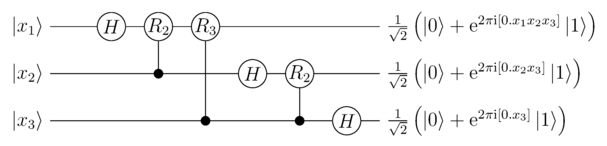

In [3]:
Image(filename='/home/jupyter/QFT-W.png')

With the discrete Fourier transform, an operation on n-qubits can be factored into the tensor product of n single-qubit operations, suggesting it is easily represented as a quantum circuit (ignoring the reverse order of outputs). In fact, each of those single-qubit operations can be implemented efficiently using a Hadamard gate and Controlled Phase Rotation gates >>. The first term requires one Hadamard gate and (n-1) controlled phase gates, the next one requires a Hadamard gate and (n-2) controlled phase gate, and each following term requires one controlled phase gate less. Summing up the number of gates gives {\displaystyle n+(n-1)+\cdots +1=n(n+1)/2=O(n^{2})} {\displaystyle n+(n-1)+\cdots +1=n(n+1)/2=O(n^{2})} gates, which is quadratic polynomial in the number of qubits.

## Recommended QISKIT Implementation 

In [33]:
q = Q_program.create_quantum_register("q", 3)
c = Q_program.create_classical_register("c", 3)

qft3 = Q_program.create_circuit("qft3", [q], [c])
qft3.h(q[0])
qft3.cu1(math.pi/2.0, q[1], q[0])
qft3.h(q[1])
qft3.cu1(math.pi/4.0, q[2], q[0])
qft3.cu1(math.pi/2.0, q[2], q[1])
qft3.h(q[2])
qft3.measure(q[0], c[2])
qft3.measure(q[1], c[1])
qft3.measure(q[2], c[0])

Create equivalent QASM code

In [34]:
circuits = ["qft3"]
print(Q_program.get_qasms(circuits)[0])

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg c[3];
h q[0];
cu1(1.57079632679490) q[1],q[0];
h q[1];
cu1(0.785398163397448) q[2],q[0];
cu1(1.57079632679490) q[2],q[1];
h q[2];
measure q[0] -> c[2];
measure q[1] -> c[1];
measure q[2] -> c[0];



Let's now implement a QFT on a prepared three qubit input state that should return $001$:

### Simulate on High-Performance IBM Simulator and plot the results

In [35]:
#backend = 'ibmqx_hpc_qasm_simulator' # the backend to run on

backend = 'ibmqx5' # the backend to run on 
result = Q_program.execute(circuits, backend=backend, shots=1024, max_credits=3, wait=10, timeout=240)


You can see that the outcome is always '000' (probability 1) for the  when you execute the code on the simulator.

In [36]:
result.get_counts("qft3")


{'0000000000000000': 183,
 '0000000000000001': 166,
 '0000000000000010': 223,
 '0000000000000011': 202,
 '0000000000000100': 108,
 '0000000000000101': 83,
 '0000000000000110': 28,
 '0000000000000111': 31}

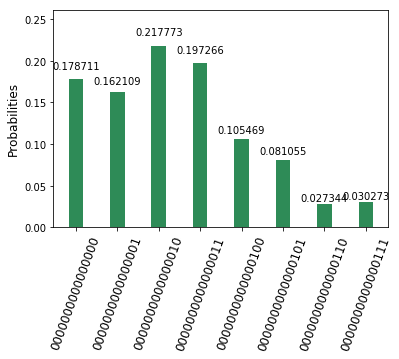

In [37]:
plot_histogram(result.get_counts("qft3"))

## Executed on IBMQX5 and plot the results

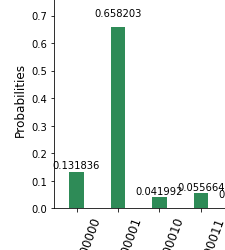

In [17]:
Image(filename='/home/jupyter/Plot-QFT.png')

We see that the highest probability outcome $(00)001$ when we execute the code on `ibmqx5`.

Reference diagram from Wikipedia:

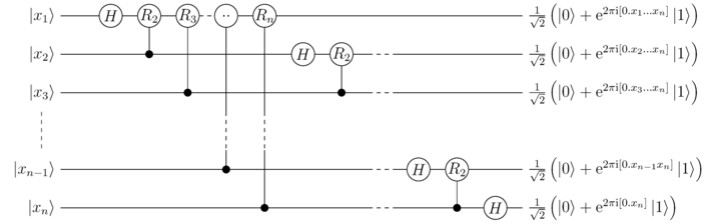

In [38]:
Image(filename='/home/jupyter/QFT4.png')